<a href="https://colab.research.google.com/github/tourloukisg/Sentiment_Analysis/blob/main/Sentiment_Analysis_Movies%26Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Sentiment Analysis (IMDB Dataset) & Pos/Neg Ratings Classification: a) Linear Discriminant Analysis, b)  Random Forest, c) KNeighbors 

**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**---------------------------------------------------**


**STRUCTURE**

*In this work, a sentiment analysis is presented based on an  IMDB movie dataset. The dataset consists of  ***a)***  the 'text' column that comprises comments about the movie and ***b)*** the 'label' column where each review is classified to either positive (1) or negative (0). The subjectivity and the polarity of each review is calculated ('textblob') and a sentiment intensity analysis is made in order to determine the positive, negative, neutral and compound scores for each individual comment. Moreover, there is a visual representation of key words where their significance with respect to the review comments is highlighted with the use of different colors and sizes ('WordCloud'). The total counts of each key word are also provided.*

*In addition, the classification of the movie reviews into 'positive' or 'negative' comment is also demonstrated. For this purpose, the dataset is split into training (75%) and test set(25%). The machine learning models employed for this case study are: ***i)***Linear Discriminant Analysis,  ***ii)*** Random Forest and  ***iii)*** KNeighbors.The models are trained to distinguish the content of a moview review into positive or negative and their classification capability is related to the accuracy of their predictions with respect to the test set. The evaluation of the models performance is based on metrics such as ***1)*** classification report (accuracy, f1 score) and ***2)*** confusion matrix.*




**The Dataset (.csv file format) for this project has been obtained from Kaggle:**

"*IMDB Dataset (Sentiment Analysis)*" -- File: "Train.csv" -- Source:https://www.kaggle.com/columbine/imdb-dataset-sentiment-analysis-in-csv-format?select=Train.csv



In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.cm as cm
from PIL import Image

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
# Loading the movies rating Dataset
data=pd.read_csv('Train.csv')
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [3]:
# Renaming the dataset columns to 'Comment' and 'Label'
data.columns=['Comment','Label']
data.head()

,Comment,Label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
# Dataset consists of 40000 records
data.shape

(40000, 2)

In [5]:
# There are no Empty records
data.isnull().sum()

Comment    0
Label      0
dtype: int64

In [6]:
# Checking for duplicates
data.duplicated('Comment').sum()

277

In [7]:
# Displaying the first occurences of duplicates
# Sorted by 'Comment' - first 5 records
data[data.duplicated(keep='last')].sort_values('Comment')[:5]

,Comment,Label
202,"""Go Fish"" garnered Rose Troche rightly or wron...",0
14788,"""Three"" is a seriously dumb shipwreck movie. M...",0
23393,"""Witchery"" might just be the most incoherent a...",0
339,(Spoilers)<br /><br />Oh sure it's based on Mo...,0
15513,"***SPOILERS*** ***SPOILERS*** Well, seeing as ...",1


In [8]:
# Displaying the last occurences of duplicates
# Sorted by 'Comment' - first 5 records
data[data.duplicated(keep='first')].sort_values('Comment')[:5]

,Comment,Label
39214,"""Go Fish"" garnered Rose Troche rightly or wron...",0
20957,"""Three"" is a seriously dumb shipwreck movie. M...",0
34900,"""Witchery"" might just be the most incoherent a...",0
39508,(Spoilers)<br /><br />Oh sure it's based on Mo...,0
34038,"***SPOILERS*** ***SPOILERS*** Well, seeing as ...",1


In [9]:
# Duplicate records are dropped
data=data.drop_duplicates()
data.shape

(39723, 2)

In [10]:
# First Movie Rating Comment
data['Comment'][1]

"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: Awsome animation, good flowing story, excellent voice cast, funny comedy and a kick-ass soundtrack. But, to my disappointment, not any of this is to be found in Atlantis: Milo's Return. Had I read some reviews first, I might not have been so let down. The following paragraph will be directed to those who have seen the first movie, and who enjoyed it primarily for the points mentioned.<br /><br />When the first scene appears, your in for a shock if you just picked Atlantis: Milo's Return from the display-case at your local videoshop (or whatever), and had the expectations I had. The music feels as a bad imitation of the first movie, and the voice cast has been replaced by a not so fitting one. (With the exception of a few characters, like the voice of Sweet). The actual drawings isnt that bad, 

In [11]:
# Use of regex for cleaning purposes
def clean1(x):
    x=re.sub(r'<br\s/>',' ',x)

    return x

In [12]:
# Apply the clean function on the 'Comment' column
data['Comment']=data['Comment'].apply(clean1)
data['Comment'][1]


"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: Awsome animation, good flowing story, excellent voice cast, funny comedy and a kick-ass soundtrack. But, to my disappointment, not any of this is to be found in Atlantis: Milo's Return. Had I read some reviews first, I might not have been so let down. The following paragraph will be directed to those who have seen the first movie, and who enjoyed it primarily for the points mentioned.  When the first scene appears, your in for a shock if you just picked Atlantis: Milo's Return from the display-case at your local videoshop (or whatever), and had the expectations I had. The music feels as a bad imitation of the first movie, and the voice cast has been replaced by a not so fitting one. (With the exception of a few characters, like the voice of Sweet). The actual drawings isnt that bad, but the an

In [13]:
# Function that uses TextBlob to return the subjectivity/polarity scores
def find_subjectivity(x):
  return TextBlob(x).sentiment.subjectivity

def find_polarity(x):
  return TextBlob(x).sentiment.polarity

In [14]:
# Subjectivity/Polarity scores based on the 'Comment' column
data['Subjectivity']=data['Comment'].apply(find_subjectivity)
data['Polarity']=data['Comment'].apply(find_polarity)

In [15]:
# Subjectivity and Polarity Columns are now present in the dataset 
data.head()

,Comment,Label,Subjectivity,Polarity
0,I grew up (b. 1965) watching and loving the Th...,0,0.635741,0.123287
1,"When I put this movie in my DVD player, and sa...",0,0.472591,0.131345
2,Why do people who do not know what a particula...,0,0.398129,-0.041369
3,Even though I have great interest in Biblical ...,0,0.616667,-0.135714
4,Im a die hard Dads Army fan and nothing will e...,1,0.591011,0.123256


In [16]:
# Function to determine the sentiment score
def Sent_Int_Analyzer(x):
    sentintanalyzer=SentimentIntensityAnalyzer()
    sentiment_score=sentintanalyzer.polarity_scores(x)
    return sentiment_score

In [17]:
# Use of 'vader_lexicon' for sentiment analysis of text obtained from social media in order
# to determine whether a statement is positive,negative,neutral
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
# Applying the Sent_Int_Analyzer function to the 'Comment' column
Analyzer=data['Comment'].apply(Sent_Int_Analyzer)
Analyzer

0        {'neg': 0.084, 'neu': 0.78, 'pos': 0.136, 'com...
1        {'neg': 0.077, 'neu': 0.781, 'pos': 0.142, 'co...
2        {'neg': 0.116, 'neu': 0.848, 'pos': 0.036, 'co...
3        {'neg': 0.204, 'neu': 0.656, 'pos': 0.14, 'com...
4        {'neg': 0.068, 'neu': 0.835, 'pos': 0.098, 'co...
                               ...                        
39995    {'neg': 0.064, 'neu': 0.766, 'pos': 0.17, 'com...
39996    {'neg': 0.055, 'neu': 0.909, 'pos': 0.036, 'co...
39997    {'neg': 0.081, 'neu': 0.805, 'pos': 0.114, 'co...
39998    {'neg': 0.043, 'neu': 0.737, 'pos': 0.22, 'com...
39999    {'neg': 0.108, 'neu': 0.695, 'pos': 0.197, 'co...
Name: Comment, Length: 39723, dtype: object

In [19]:
# Lists consisting of the compound, positive,negative and neutral scores
from operator import itemgetter
Compound = list(map(itemgetter('compound'), Analyzer)) 
Positive = list(map(itemgetter('pos'), Analyzer)) 
Negative = list(map(itemgetter('neg'), Analyzer)) 
Neutral= list(map(itemgetter('neu'), Analyzer)) 


In [20]:
# Adding the calculated  sensitivity intensity analysis scores to the movie dataset
data['Compound']=Compound
data['Positive']=Positive
data['Negative']=Negative
data['Neutral']=Neutral
data.head()

,Comment,Label,Subjectivity,Polarity,Compound,Positive,Negative,Neutral
0,I grew up (b. 1965) watching and loving the Th...,0,0.635741,0.123287,0.6502,0.136,0.084,0.780
1,"When I put this movie in my DVD player, and sa...",0,0.472591,0.131345,0.9683,0.142,0.077,0.781
2,Why do people who do not know what a particula...,0,0.398129,-0.041369,-0.9568,0.036,0.116,0.848
3,Even though I have great interest in Biblical ...,0,0.616667,-0.135714,-0.7515,0.140,0.204,0.656
4,Im a die hard Dads Army fan and nothing will e...,1,0.591011,0.123256,0.7469,0.098,0.068,0.835


In [21]:
# Dropping the 'Comment' column as all necessary information has been extracted from the movie 'Comment' records
# as presented in the previous cells and added to the dataframe
datapred=data.drop('Comment',axis=1)
datapred.head()

,Label,Subjectivity,Polarity,Compound,Positive,Negative,Neutral
0,0,0.635741,0.123287,0.6502,0.136,0.084,0.780
1,0,0.472591,0.131345,0.9683,0.142,0.077,0.781
2,0,0.398129,-0.041369,-0.9568,0.036,0.116,0.848
3,0,0.616667,-0.135714,-0.7515,0.140,0.204,0.656
4,1,0.591011,0.123256,0.7469,0.098,0.068,0.835


In [22]:
# Selecting the independent(X) and the dependent(y) parameters that are to be used for the training of the models
X=datapred.drop('Label',axis=1).values
y=datapred['Label'].values

In [23]:
# Spliting the dataset into training and test samples (test_size=25%)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [24]:
#Importing linear discriminant analysis from sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [25]:
# Fitting the data  passed in the model with LDA
model=LinearDiscriminantAnalysis().fit(X_train,y_train)
# Predict the Labels for the X_test samples
LDA_prediction=model.predict(X_test)
LDA_prediction

array([1, 0, 1, ..., 1, 0, 0])

In [26]:
#Importing the necessary metrics from sklearn
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [27]:
# Classification report test values vs. predictions
print(classification_report(y_test,LDA_prediction))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      5070
           1       0.75      0.80      0.78      4861

    accuracy                           0.77      9931
   macro avg       0.77      0.77      0.77      9931
weighted avg       0.78      0.77      0.77      9931



In [28]:
#Confusion matrix of test values vs. predictions
print(confusion_matrix(y_test,LDA_prediction))

[[3777 1293]
 [ 953 3908]]


In [29]:
# Importing the Random Forest Classifier from sklearn
from sklearn.ensemble import RandomForestClassifier
# Selecting the classifier parameters
rf_classifier=RandomForestClassifier(n_estimators=500,criterion='gini',max_features='sqrt',random_state=0)
# Fitting the data passed in the model with the RandomForestClassifier
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [30]:
# Predict the Labels for the X_test samples
RF_prediction=rf_classifier.predict(X_test)
RF_prediction

array([1, 0, 1, ..., 1, 0, 0])

In [31]:
#Classification Report of test values vs. predictions
print(classification_report(y_test,RF_prediction))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      5070
           1       0.76      0.77      0.76      4861

    accuracy                           0.77      9931
   macro avg       0.77      0.77      0.77      9931
weighted avg       0.77      0.77      0.77      9931



In [32]:
# Confusion matrix of test values vs. predictions
print(confusion_matrix(y_test,RF_prediction))

[[3910 1160]
 [1140 3721]]


In [33]:
# Importing the KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
# Selecting the classifier parameters
knn_classifier=KNeighborsClassifier(weights='uniform',n_neighbors=5,metric='minkowski',p=2)
# Fitting the data passed in the model with the KNeighborsClassifier
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
# Fitting the data passed in the model with the KNeighborsClassifier
KNN_prediction=knn_classifier.predict(X_test)
KNN_prediction

array([1, 0, 1, ..., 1, 0, 0])

In [35]:
# Classification Report of test values vs. predictions
print(classification_report(y_test,KNN_prediction))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      5070
           1       0.74      0.74      0.74      4861

    accuracy                           0.74      9931
   macro avg       0.74      0.74      0.74      9931
weighted avg       0.74      0.74      0.74      9931



In [36]:
# Confusion matrix of test values vs. predictions
print(confusion_matrix(y_test,KNN_prediction))

[[3810 1260]
 [1282 3579]]


In [37]:
# Presenting the total number of predicted values with respect to the Label output & the models accuracy scores 
count_lda = np.unique(LDA_prediction,return_counts=True)
count_rf_model = np.unique(RF_prediction, return_counts=True)
count_knn_model = np.unique(KNN_prediction, return_counts=True)
print('The total number of negative & positive ratings predicted by LDA are {0} and {1} respectively'.
      format(count_lda[1][0],count_lda[1][1]))
print('The LDA accuracy_score is {0} '.format(accuracy_score(y_test,LDA_prediction)))
print('\r')
print('The total number of negative & positive ratings predicted by Random Forest are {0} and {1} respectively'.
      format(count_rf_model[1][0],count_rf_model[1][1]))
print('The Random Forest accuracy_score is {0} '.format(accuracy_score(y_test,RF_prediction)))
print('\r')
print('The total number of negative & positive ratings predicted by KNN are {0} and {1} respectively'.
      format(count_knn_model[1][0],count_knn_model[1][1]))
print('The KNN accuracy_score is {0} '.format(accuracy_score(y_test,KNN_prediction)))


The total number of negative & positive ratings predicted by LDA are 4730 and 5201 respectively
The LDA accuracy_score is 0.7738394924982378 

The total number of negative & positive ratings predicted by Random Forest are 5050 and 4881 respectively
The Random Forest accuracy_score is 0.7684019736179639 

The total number of negative & positive ratings predicted by KNN are 5092 and 4839 respectively
The KNN accuracy_score is 0.7440338334508106 


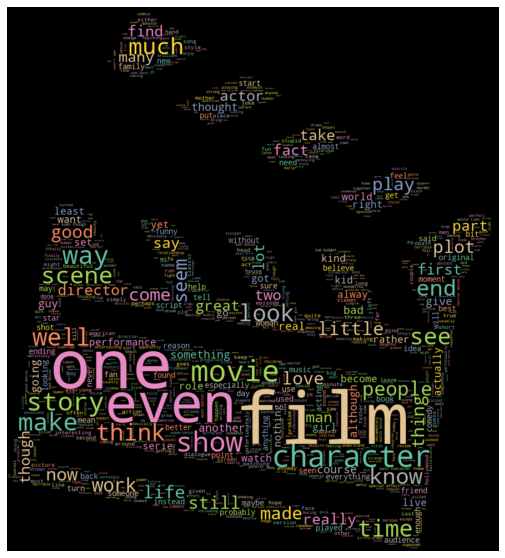

In [38]:
# Word Frequency Cloud Plot
stopwords=STOPWORDS
stopwords.add('-')

Comment_Words=' '.join([word for word in data['Comment'].str.lower()])
word_importance=WordCloud(width=1500,height=1000,random_state=1,max_font_size=130,max_words=1000,
                    background_color='black',colormap='Set2',stopwords=stopwords,
                    mask=np.array(Image.open('cinema.png'))).generate(Comment_Words)
plt.figure(figsize=(15,10))
plt.imshow(word_importance,interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
# Creating a list with all 'WordCloud' words
common_words=[]

for x in word_importance.words_.items():
  common_words.append(x)
# Sorting the words based on their score 
def sort_word(i):  
   return(sorted(i, key = lambda x: x[1],reverse=True))
word_imp=sort_word(common_words)
ten_most_frequent_words=word_imp[:10]
ten_most_frequent_words



[('film', 1.0),
 ('one', 0.8918880922255026),
 ('even', 0.5506818501335583),
 ('character', 0.5308121280284924),
 ('movie', 0.5200806035896715),
 ('show', 0.4655794554571442),
 ('story', 0.4188574909789587),
 ('way', 0.40090913351141105),
 ('make', 0.3839448896386897),
 ('well', 0.37349454051267633)]

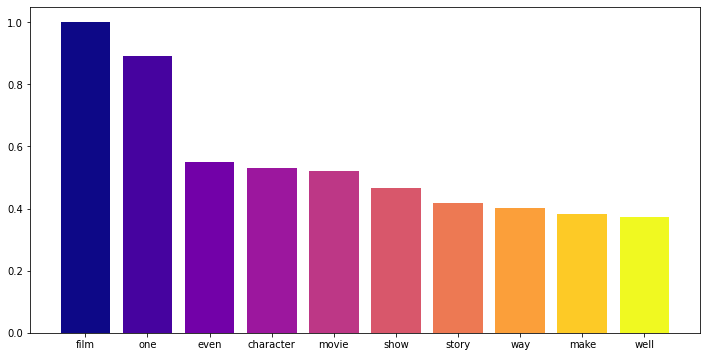

In [40]:
# Sorting the words with the highest score (Top 10) 
words=[]
val=[]
for i in range(len(ten_most_frequent_words)):
    words.append(ten_most_frequent_words[i][0])
    val.append(ten_most_frequent_words[i][1])
plt.figure(figsize=(12,6))
plt.bar(words,val,
        color=cm.plasma(np.linspace(0, 1, 10)))
plt.show()

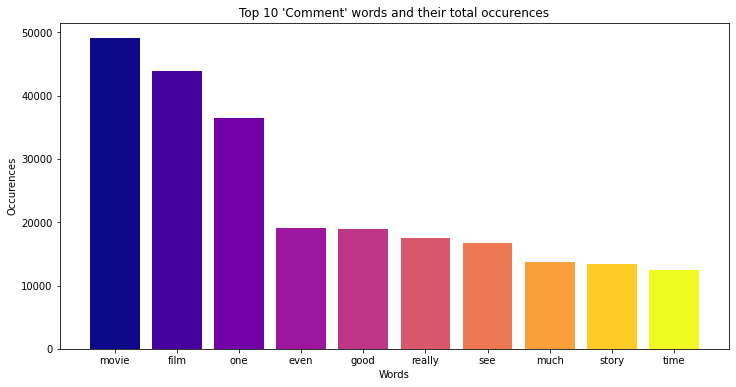

In [41]:
# Total Count of Words (not in stopwords)
stopwords.add('will')
used_words = [i for i in Comment_Words.split() if i not in stopwords]
wordscount = Counter(used_words)
words = []
occurences = []

for x, c in wordscount.most_common(10):
    words.append(x)
    occurences.append(c)

plt.figure(figsize=(12,6))
plt.title("Top 10 'Comment' words and their total occurences")
plt.xlabel('Words')
plt.ylabel('Occurences')
plt.bar(words,occurences, color=cm.plasma(np.linspace(0, 1, 10)))
plt.show()